# Creating final data for crop and fertilizer recommendation system

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
fertilizer_data_path = r'D:\TY\SEM V\EDI\EDAI\EDAI\datasets\FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [35]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,peas,60,60,50,6.0
1,1,watermelon,100,40,90,6.0
2,2,okra,25,40,40,5.5


In [36]:
del merge_fert['Unnamed: 0']

In [37]:
merge_fert.describe()

,N,P,K,pH
count,3.000000,3.000000,3.000000,3.000000
mean,61.666667,46.666667,60.000000,5.833333
std,37.527767,11.547005,26.457513,0.288675
min,25.000000,40.000000,40.000000,5.500000
25%,42.500000,40.000000,45.000000,5.750000
50%,60.000000,40.000000,50.000000,6.000000
75%,80.000000,50.000000,70.000000,6.000000
max,100.000000,60.000000,90.000000,6.000000


In [38]:
merge_fert['Crop'].unique()

array(['peas', 'watermelon', 'okra'], dtype=object)

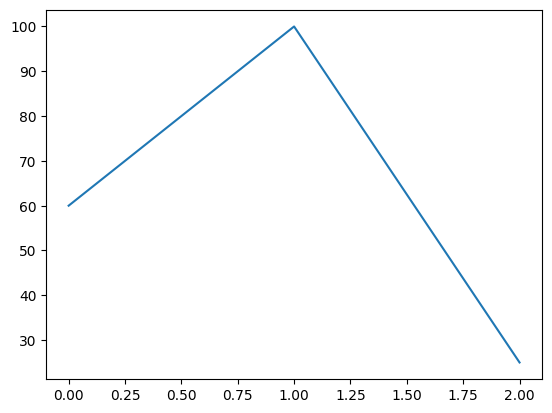

In [39]:
plt.plot(merge_fert["N"])

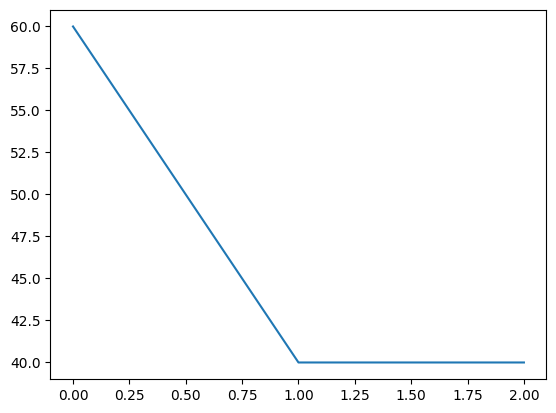

In [40]:
plt.plot(merge_fert["P"])

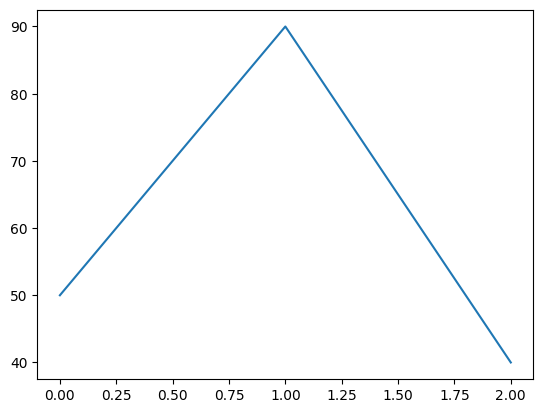

In [41]:
plt.plot(merge_fert["K"])

In [42]:
# Remove any column that starts with 'Unnamed'
merge_fert = merge_fert.loc[:, ~merge_fert.columns.str.contains('^Unnamed')]


Crop     object
N         int64
P         int64
K         int64
pH      float64
dtype: object


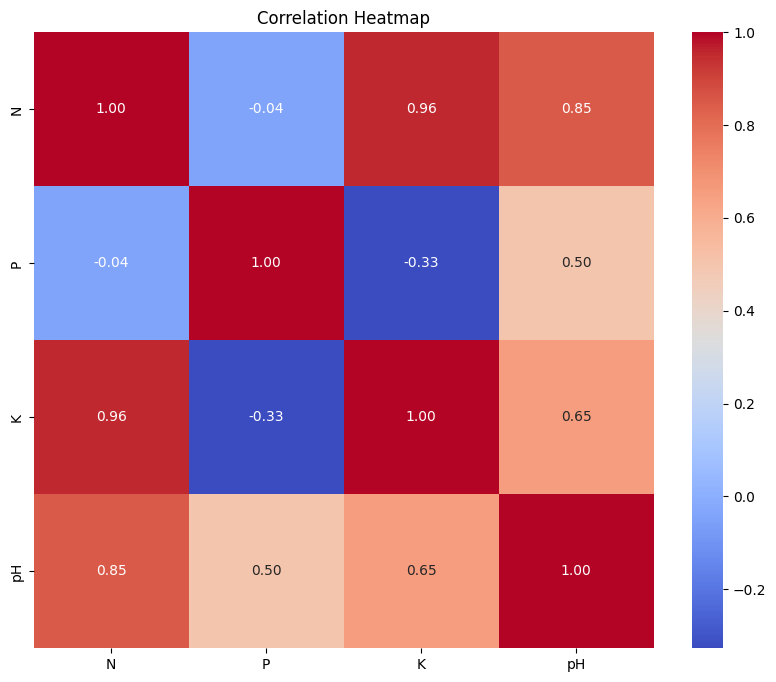

In [43]:
import pandas as pd
import numpy as np  # Make sure to import numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merge_fert is already defined
# For example:
# merge_fert = pd.read_csv('your_file.csv')  # Replace with your data source

# Step 1: Inspect the data types
print(merge_fert.dtypes)

# Step 2: Select numeric columns
numeric_merge_fert = merge_fert.select_dtypes(include=[np.number])

# Step 3: Compute the correlation matrix
correlation_matrix = numeric_merge_fert.corr()

# Step 4: Create the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [44]:

merge_crop = pd.read_csv(r'D:\TY\SEM V\EDI\EDAI\EDAI\datasets\MergeFileCrop.csv')
reco_fert = merge_fert

In [45]:
import pandas as pd
import random

# Initialize an empty list to hold the dictionaries
data = []

# Loop through each row in merge_crop
for i in range(merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    
    # Get the recommended NPK values for the crop
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20, 20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5, 20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5, 5)
    
    # Create a dictionary for the current crop
    d = {"N": N, "P": P, "K": K}
    
    # Append the dictionary to the list
    data.append(d)

# Create a DataFrame from the list of dictionaries
temp = pd.DataFrame(data)



In [46]:
temp

,N,P,K
0,46,66,50
1,71,79,54
2,51,62,55
3,77,71,47
4,44,70,55
...,...,...,...
295,42,55,44
296,17,38,44
297,7,35,43
298,23,52,40


In [47]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [48]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,WaterLevel,label,N,P,K
0,0,18.358748,13.382365,6.249825,54.855803,peas,46,66,50
1,1,17.524254,13.885678,6.485207,45.993709,peas,71,79,54
2,2,18.857026,13.002438,6.629290,52.483552,peas,51,62,55
3,3,18.341554,13.791686,6.298005,51.955565,peas,77,71,47
4,4,16.329481,13.046447,6.792862,45.678054,peas,44,70,55
...,...,...,...,...,...,...,...,...,...
295,295,31.484517,48.779263,4.525722,93.172220,okra,42,55,44
296,296,27.698193,51.415932,5.403908,100.772070,okra,17,38,44
297,297,30.412358,52.481006,6.621624,93.923759,okra,7,35,43
298,298,32.177520,54.013527,6.207496,91.887661,okra,23,52,40


In [49]:
del merge_crop['Unnamed: 0']

In [50]:
merge_crop

,temperature,humidity,ph,WaterLevel,label,N,P,K
0,18.358748,13.382365,6.249825,54.855803,peas,46,66,50
1,17.524254,13.885678,6.485207,45.993709,peas,71,79,54
2,18.857026,13.002438,6.629290,52.483552,peas,51,62,55
3,18.341554,13.791686,6.298005,51.955565,peas,77,71,47
4,16.329481,13.046447,6.792862,45.678054,peas,44,70,55
...,...,...,...,...,...,...,...,...
295,31.484517,48.779263,4.525722,93.172220,okra,42,55,44
296,27.698193,51.415932,5.403908,100.772070,okra,17,38,44
297,30.412358,52.481006,6.621624,93.923759,okra,7,35,43
298,32.177520,54.013527,6.207496,91.887661,okra,23,52,40


In [51]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'WaterLevel', 'label']]

In [52]:
file_path = r'D:\TY\SEM V\EDI\EDAI\EDAI\datasets\Crop_recommendation.csv'
merge_crop.to_csv(file_path,index=False)

In [53]:
# Checking if everything went fine
df = pd.read_csv(r'D:\TY\EDI\EDAI\EDAI\datasets\Crop_recommendation.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\TY\\EDI\\EDAI\\EDAI\\datasets\\Crop_recommendation.csv'

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,WaterLevel,label
0,65,75,47,18.358748,13.382365,6.249825,54.855803,peas
1,59,70,46,17.524254,13.885678,6.485207,45.993709,peas
2,46,69,45,18.857026,13.002438,6.629290,52.483552,peas
3,60,70,47,18.341554,13.791686,6.298005,51.955565,peas
4,78,55,46,16.329481,13.046447,6.792862,45.678054,peas


In [ ]:
df.shape

(300, 8)